In [11]:
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [46]:

# To connect MySQL database 
connection = pymysql.connect(
    host='192.168.11.6',
    user='root', 
    password='water',
    database='waterdata',
    port=30000)


try:
    with connection.cursor() as cursor:
               
        sql1 = ('''  SELECT 
                        `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`mean_temp` AS `GW971623.1.1`,
                        `B`.`meter_no` AS `bl_meter2`, `B`.`mean_temp` AS `GW971623.2.2`
                                   
                    FROM   
                        `groundwater` AS `A`
                    INNER JOIN
                         `groundwater` `B` ON (`B`.`meter_no` = "GW971623.2.2" AND `B`.`read_date` = `A`.`read_date` )
                                            
                    WHERE  
                        `A`.`meter_no` = "GW971623.1.1"
                    ''')
        
        sql2 = ('''  SELECT 
                        `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, `A`.`mean_temp` AS `mean_temp1` 
                                   
                    FROM   
                        `groundwater` AS `A`  
                                            
                    WHERE  
                        `A`.`meter_no` = "GW971623.2.2"
                    ''')
            
        sql3 = ('''  SELECT 
                        `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_bmp` AS `GW971623.3.3`, `A`.`mean_temp` AS `mean_temp1` 
                                   
                    FROM   
                        `groundwater` AS `A`  
                                            
                    WHERE  
                        `A`.`meter_no` = "GW971623.3.3"
                    ''')    
               
        
        df1 = pd.read_sql_query(sql1, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)
        df2 = pd.read_sql_query(sql2, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)
        df3 = pd.read_sql_query(sql3, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)
        
    df1.shape
    df2.shape
    df3.shape
except:
    print("Error: unable to convert the data")
connection.close()


In [47]:
df1.shape

(1414, 5)

In [48]:
df1.head()

,read_date,bl_meter1,GW971623.1.1,bl_meter2,GW971623.2.2
0,2018-10-02,GW971623.1.1,151.685,GW971623.2.2,41.118
1,2018-10-03,GW971623.1.1,151.685,GW971623.2.2,41.140
2,2018-10-04,GW971623.1.1,151.685,GW971623.2.2,41.149
3,2018-10-05,GW971623.1.1,151.685,GW971623.2.2,41.175
4,2018-10-06,GW971623.1.1,151.685,GW971623.2.2,41.214


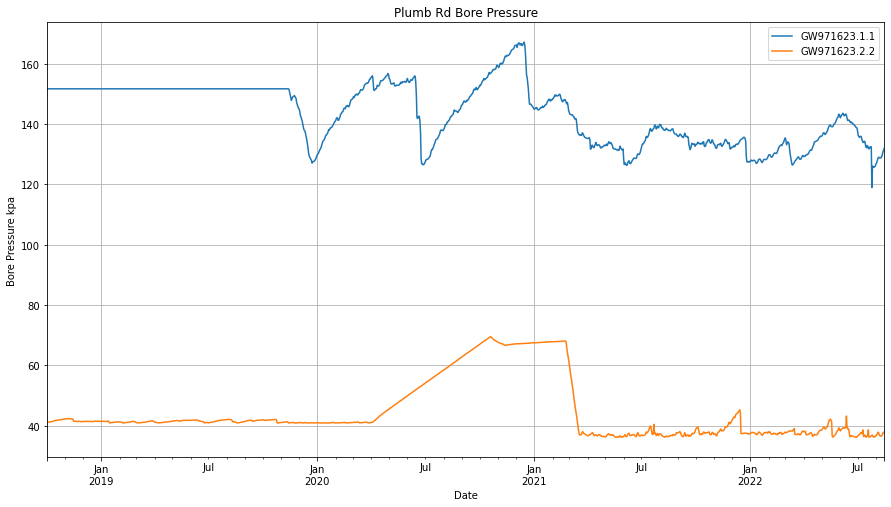

In [49]:


fig1 = df1.plot(x='read_date', y=['GW971623.1.1', 'GW971623.2.2'],figsize=(15,8), grid=True, title='Plumb Rd Bore Pressure', xlabel='Date',ylabel='Bore Pressure kpa').get_figure()
plt.savefig('Plumb_Rd_Bore_Pressure.jpg')
plt.show()


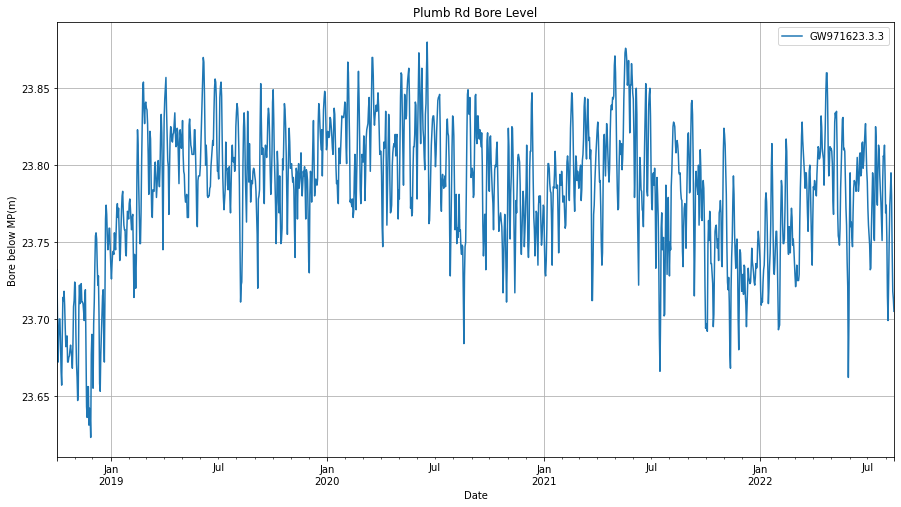

In [50]:
fig2 = df3.plot(x='read_date', y='GW971623.3.3',figsize=(15,8), grid=True, title='Plumb Rd Bore Level', xlabel='Date',ylabel='Bore below MP(m)').get_figure()
plt.savefig('Plumb_Rd_Bore_Level.jpg')
plt.show()
